# Task 1: Data Exploration and Preprocessing

Q1. Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

Q2. Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

Q3. Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame or equivalent data structure.
df= pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
# Pre-processing the data

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Join tokens back into string
    clean_text = ' '.join(tokens)
    return clean_text

# Apply preprocessing to each row in the 'Data' column
df['Cleaned_Text'] = df['Data'].apply(preprocess_text)

In [3]:
# Drop unwanted columns 'Unnamed: 0' and 'Data'
df.drop(columns=['Unnamed: 0', 'Data'], inplace=True)
df

,Labels,Cleaned_Text
0,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
3,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...
...,...,...
19992,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...
19993,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...
19994,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...
19995,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...


#### Feature extraction to convert text data into a format that can be used by the Naive Bayes model

In [4]:
# Prepare data and labels
X = df['Cleaned_Text']
y = df['Labels']

In [5]:
# Vectorize text data using CountVectorizer
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)

In [6]:
# Compute TF-IDF scores
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Task 2: Naive Bayes Model for Text Classification

Q1. Split the data into training and test sets.

Q2. Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

Q3. Train the model on the training set and make predictions on the test set.

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [8]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [9]:
# Make prediction on the test data
y_pred = nb_classifier.predict(X_test)

In [10]:
# Evaluate model performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8975

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.75       173
           comp.graphics       0.88      0.91      0.90       179
 comp.os.ms-windows.misc       0.93      0.88      0.91       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.85       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.97      0.94      0.96       186
            misc.forsale       0.91      0.77      0.84       190
               rec.autos       0.91      0.95      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.97      0.99      0.98       203
               sci.crypt       0.90      0.98      0.94       200
         sci.electronics       0.94      0.90      0.92       227
                 sci.med       1.0

# Task 3: Sentiment Analysis

Q1. Choose a suitable library or method for performing sentiment analysis on the blog post texts.

Q2. Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

Q3. Examine the distribution of sentiments across different categories and summarize your findings.

For performing sentiment analysis on blog post texts, a suitable library that is widely used and effective is the VADER (Valence Aware Dictionary and sEntiment Reasoner) from the 'nltk' (Natural Language Toolkit) library in Python. VADER is specifically designed for sentiment analysis of social media texts, which includes blog posts. It does not require training data, making it easy to use out of the box.

#### Reasons for choosing VADER:

1. Pre-trained Model: VADER comes with a pre-trained sentiment lexicon that has been specifically tuned to social media texts. This lexicon includes sentiment scores for words and idioms that are common in informal texts like blog posts.
2. Handles Contextual Sentiment: VADER not only gives a positive, negative, and neutral sentiment score but also considers the intensity of each sentiment. It can handle sentiment expressions that are typically challenging for traditional methods.
3. Easy Integration: VADER is part of the 'nltk' library in Python, making it easy to integrate into our sentiment analysis pipeline.

In [11]:
# Performing sentiment analysis using VADER

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Add VADER scores to the DataFrame
df['Sentiment'] = df['Cleaned_Text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Display the dataframe
df

,Labels,Cleaned_Text,Sentiment
0,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...,0.9468
1,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...,0.9999
2,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,-0.4840
3,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...,0.4606
4,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...,-0.9794
...,...,...,...
19992,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...,-0.6486
19993,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...,0.9419
19994,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,0.7579
19995,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,-0.0000


In [12]:
# Define a function to categorize the text into categories 'positive', 'negative' or 'neutral' based on Sentiment score

# Considering threshold values as 0.05 and -0.05
def get_sentiment_category(sentiment_score):
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment category function to each row in the DataFrame
df['Sentiment_Category'] = df['Sentiment'].apply(get_sentiment_category)

In [13]:
# View the DataFrame with sentiment categories
df

,Labels,Cleaned_Text,Sentiment,Sentiment_Category
0,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...,0.9468,positive
1,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...,0.9999,positive
2,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,-0.4840,negative
3,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...,0.4606,positive
4,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...,-0.9794,negative
...,...,...,...,...
19992,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...,-0.6486,negative
19993,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...,0.9419,positive
19994,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,0.7579,positive
19995,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,-0.0000,neutral


In [14]:
# Group by 'Labels' and summarize sentiment distribution
summary = df.groupby('Labels')['Sentiment_Category'].value_counts(normalize=True).unstack()

# Print the summary statistics
print("Sentiment Distribution Across Different Categories:\n")
summary

Sentiment Distribution Across Different Categories:



Sentiment_Category,negative,neutral,positive
Labels,,,
alt.atheism,0.346000,0.018000,0.636000
comp.graphics,0.086000,0.058000,0.856000
comp.os.ms-windows.misc,0.153000,0.052000,0.795000
comp.sys.ibm.pc.hardware,0.170000,0.043000,0.787000
comp.sys.mac.hardware,0.194000,0.055000,0.751000
comp.windows.x,0.197000,0.053000,0.750000
misc.forsale,0.124000,0.075000,0.801000
rec.autos,0.277000,0.047000,0.676000
rec.motorcycles,0.286000,0.036000,0.678000


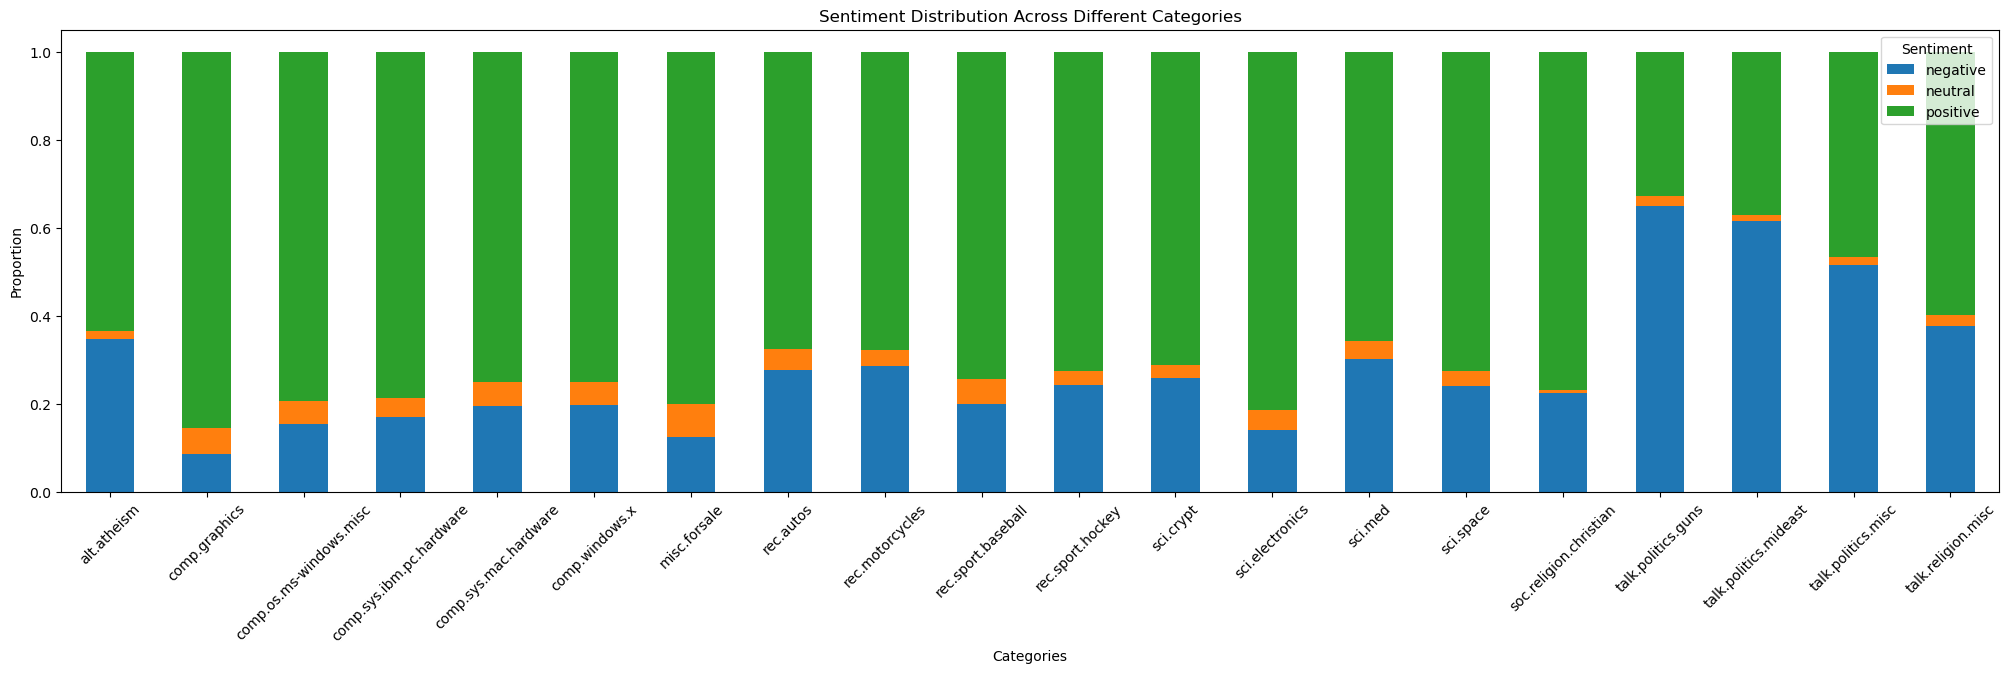

In [24]:
# Visualizing the distribution using a stacked bar chart

summary.plot(kind='bar', stacked=True, figsize=(25, 6), width=0.5)
plt.title('Sentiment Distribution Across Different Categories')
plt.xlabel('Categories')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

#### Key Findings:

1. Overall Sentiment Distribution:
    1. Negative Sentiment: The categories with the highest proportions of negative sentiments include talk.politics.guns (64.8%), talk.politics.mideast (61.6%), and talk.politics.misc (51.4%).
    2. Neutral Sentiment: Most categories have relatively low proportions of neutral sentiments, typically ranging from around 0.02 to 0.08.
    3. Positive Sentiment: Categories with the highest proportions of positive sentiments include alt.atheism (63.6%), comp.graphics (85.6%), sci.electronics (81.4%), and misc.forsale (80.1%).
2. Variation Across Categories:
    1. Diversity in Sentiment: There is significant variation in sentiment distribution across different categories, indicating that sentiment expression varies widely depending on the topic.
    2. Negative Focus: Categories like talk.politics.guns, talk.politics.mideast, and talk.politics.misc tend to have a higher focus on negative sentiments, potentially reflecting contentious or polarizing topics.
    3. Positive Focus: Categories such as comp.graphics, sci.electronics, and misc.forsale show a more positive sentiment orientation, possibly indicating discussions around technology, sales, and related topics.
3. Neutral Sentiments:
    1. Low Prevalence: Neutral sentiments are generally less prevalent across most categories, suggesting that blog posts often express clear positive or negative viewpoints rather than being neutral in tone.

# Task 4: Evaluation

Q1. Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

Q2. Discuss the performance of the model and any challenges encountered during the classification process.

Q3. Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

In [25]:
# Evaluating model performance

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average precision
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average recall
f1 = f1_score(y_test, y_pred, average='weighted')  # weighted average F1-score

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8975
Precision: 0.8966
Recall: 0.8975
F1-score: 0.8958


#### Performance Evaluation:

1. Accuracy: Naive Bayes classifiers are generally efficient and work well with large feature spaces, such as text classification tasks where each word or n-gram is a feature. If accuracy is high, it indicates that the model is correctly classifying a large proportion of the blog posts.
2. Precision and Recall: Precision measures the accuracy of positive predictions, while recall measures the fraction of actual positives that were correctly identified. For text classification, achieving a balance between precision and recall is crucial. High precision indicates that when the model predicts a category, it is usually correct, while high recall indicates that the model can identify most instances of a category.
3. F1-score: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. A high F1-score indicates that the model has both good precision and recall.

#### Challenges Encountered:

1. Feature Engineering: Preprocessing text data (cleaning, tokenization, removing stopwords, etc.) is crucial. The quality of text preprocessing directly affects how well the model can learn from the data. This is why we have to make sure to clean the data as best as possible to make sure that the data is ready for training.
2. Model Tuning: Tuning hyperparameters (e.g., smoothing parameter for Naive Bayes) is crucial to optimize model performance. It took some efforts to tune the hyperparameters in such a way that the model performance is optimized.

#### Implications:

1. Content Analysis: Understanding sentiment distributions can help in analyzing the general tone and emotional context of blog posts within specific categories.
2. Targeted Engagement: Tailoring engagement strategies based on sentiment trends can be crucial for effectively reaching and resonating with audiences within different topic domains.
3. Comparative Insights: Comparative analysis across categories provides insights into how sentiment varies across different subjects, which can inform content creation, marketing strategies, and community management efforts.